In [8]:
# 설치 코드
!pip install opencv-python opencv-contrib-python

### 이미지 로딩

In [5]:
import cv2

In [8]:
#IMREAD 이미지를 읽는 함수
#cv2.IMREAD_COLOR 컬러로 이미지를 읽음
img=cv2.imread('images/a11.png', cv2.IMREAD_COLOR)

# 새창으로 이미지 출력
#cv2.imshow(윈도우창 이름, 이미지명)
cv2.imshow("a11_img",img)

#사용자가 키보드의 키를 누를 때까지 창을 계속 열어두고 대기
k=cv2.waitKey(0)

#연창을 모두 닫아줌
#49는 키보드의  아스키코드 1 을 의미
if k==49:
    cv2.destroyAllWindows()

- imread(파일명, 이미지형식) : 이미지 파일을 읽기 위한 객체리턴
- 칼라 : cv2.IMREAD_COLOR, 흑백: cv2.IMREAD_GRAYSCALE 으로 지정
- imshow(제목, 이미지객체) : 이미지 출력
- waitKey(0) : 키보드 입력을 기다리는 시간 설정 0 : 계속 기다림
- destoryAllWindows() : 생성한 윈도우를 모두 닫아줌

### matplotlib 라이브러리를 이용한 컬러 이미지 출력

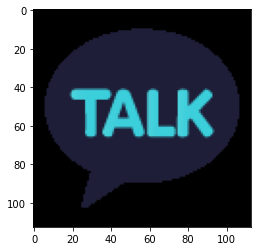

In [15]:
import cv2
import matplotlib.pyplot as plt

img=cv2.imread('images/B22.png', cv2.IMREAD_COLOR)
plt.imshow(img) #PLT 안에 있는 이미지 쇼 함수
#RGB와 -> BGR 컬러사용 방식차이

In [20]:
import cv2
import matplotlib.pyplot as plt

img=cv2.imread('images/B22.png', cv2.IMREAD_COLOR)
#BGR로 사용하는 파이썬이미지를 RGB로 변경하겠다
img=cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
plt.imshow(img) #PLT 안에 있는 이미지 쇼 함수


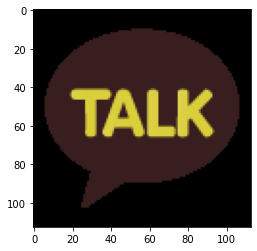

In [19]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('images/B22.png', cv2.IMREAD_COLOR)
(b,g,r) = cv2.split(img) # img파일을 b,g,r로 분리
img2 = cv2.merge([r,g,b])

plt.imshow(img2)

### 이미지 색상에 따른 분류
- 칼라 이미지: rgb(red,green,blue)로 구성된 이미지
    - 각 색상은 8비트 : 0-255로 구성 -> 24비트(별칭 트루컬러)
    - 32 비트 컬러 ARGB (A: 투명도)
    - 한장의 이미지는 3장의 채널
- 흑백 이미지(그레이스케일 이미지): 검정색과 흰색을 0-255로 구분된 이미지
- 이진 이미지(바이너리 이미지): 검정색과(0)과 흰색(255또는 1)으로만 구성된 이미지

### 이미지를 흑백(Gray)   이미지 읽어오기

In [28]:
import cv2
import matplotlib.pyplot as plt

#흑백이미지로 변환해서 읽어오기 IMREAD_GRAYSCALE
img=cv2.imread('images/B22.png', cv2.IMREAD_GRAYSCALE)

#흑백 생상공간 사용하겠다고 설정
# interpolation : 보간법 설법(none, nearest 등)
plt.imshow(img, cmap='gray', interpolation='bicubic')
plt.xticks([])
plt.yticks([])
plt.title('graycolor')
plt.show()

### 이진(Binary) 이미지 만들기

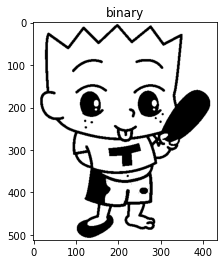

In [39]:
img = cv2.imread('images/down.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(img,cmap='gray')

#이미지에서 원하는 부분을 검출 하기 위해 색상을 변경해 가면서 문자를 읽어 와야 한다.
# img, 100(숫자변경), 255, cv2.THRESH_BINARY
#0-255(0 어둡고, 255 밝음)
ret, img2 = cv2.threshold(img, 120,255, cv2.THRESH_BINARY)
plt.imshow(img2, cmap='gray')
plt.title('binary')
plt.show()

- cv2.threshold(img, threshold_value, value, flag)
  - img : Grayscale 이미지
  - threshold_value : 픽셀 문턱값 (0과 1로 나누기 위한 기준값)
  - value : 문턱값보다 클 때 적용되는 값
  - flag : 문턱값 적용 방법
    - cv2.THRESH_BINARY : 픽셀값이 문턱값보다 크면 value, 아니면 0을 할당
    - cv2.THRESH_BINARY_INV : 픽셀값이 문턱값보다 크면 0, 아니면 value를 할당
    - cv2.THRESH_TRUNC : 픽셀값이 문턱값보다 크면 문턱값, 아니면 픽셀값을 그대로 할당
    - cv2.THRESH_TOZERO : 픽셀값이 문턱값보다 크면 픽셀값, 아니면 0을 할당  
    - cv2.THRESH_TOZERO_INV : 픽셀값이 문턱값보다 크면 0, 아니면 픽셀값을 할당    
   

In [3]:
import cv2

try:
    print('카메라를 구동함둥')
    cap=cv2.VideoCapture('mp4/down.mp4')
    # cap=cv2.VideoCapture(0) 캠 화면 불러오기
except:
    print('카메라 구동 실패했슴둥')
    
cap.set(3,480) #가로 화면 크기
cap.set(4,320) #세로 화면 크기

while True:
    print('while문 들어옴둥')
    
    # 이미지를 잘 읽었으면 True, 아니면 False
    # frame 동영상으로 부터 읽은 이미지 한장
    ret, frame = cap.read()
    
    #만약 읽지 못했으면 종료
    if not ret:
        print('이미지 읽기 실패했음둥')
        cap.realease() # 카메라 종료
        cv2.destroyAllWindows() # 열린 창 닫기
        break
        
    # 이미지를 읽었다면 출력
    color = cv2.cvtColor(frame, cv2.COLOR_RGB2RGBA)
    cv2.imshow('cctv', color)
    
    # ms 밀리초 단위 / 일반적으로 동영상은 1초 30프레임 출력
    # 1밀리초 = 0.001초
    k=cv2.waitKey(33)
    
    if k==49:
        cap.release() #카메라 종료
        cv2.destroyAllWindows()
        break

카메라를 구동함둥
while문 들어옴둥
while문 들어옴둥
while문 들어옴둥
while문 들어옴둥
while문 들어옴둥
while문 들어옴둥
while문 들어옴둥
while문 들어옴둥
while문 들어옴둥
while문 들어옴둥
while문 들어옴둥
while문 들어옴둥
while문 들어옴둥
while문 들어옴둥
while문 들어옴둥
while문 들어옴둥
while문 들어옴둥
while문 들어옴둥
while문 들어옴둥
while문 들어옴둥
while문 들어옴둥
while문 들어옴둥
while문 들어옴둥
while문 들어옴둥
while문 들어옴둥
while문 들어옴둥
while문 들어옴둥
while문 들어옴둥
while문 들어옴둥
while문 들어옴둥
while문 들어옴둥
while문 들어옴둥
while문 들어옴둥
while문 들어옴둥
while문 들어옴둥
while문 들어옴둥
while문 들어옴둥
while문 들어옴둥
while문 들어옴둥
while문 들어옴둥
while문 들어옴둥
while문 들어옴둥


### 비디오(카메라, 영상) 안에 한 프레임을 이미지 파일로 저장
- cv2.VideoCapture(0) : 0번 카메라로부터 비디오 캡처
  - 0 대신에 파일명을 입력하면 동영상으로부터 캡처 
  - cv2.VideoCapture("images/video.mp4")

- cap.set(3, 480) / cap.set(4, 320) : 비디오의 가로/세로 크기
- ret, frame = cap.read() : 카메라로부터 비디오 파일을 읽고 프레임(frame)과 읽기여부(ret)를 반환
- cv2.cvtColor() : 색상공간 변환 함수
- cv2.waitKey(30) : 0.03초동안 키 입력을 대기 (30프레임인 경우)
- 숫자 1을 클릭하면 비디오를 종료하고 윈도우메모리 해제

In [4]:
import cv2

try:
    print('카메라를 구동, 영상을 킵니다.')
    
    cap=cv2.VideoCapture('mp4/down.mp4')
except:
    print('카메라, 영상 구동 실패했습니다.')
    
cnt=0
while True:
    ret, frame=cap.read()
    k=cv2.waitKey(33)
    
    cv2.imshow('frame', frame)
    
    if k==49:
        cap.release()
        cv2.destroyAllWindows()
        break
        
    if k==50: #숫자2를 누프면 캡쳐
        cnt+=1
        print(f'mp4/video{cnt}.png')
        
        #[cv2.IMWRITE_PNG_COMPRESSION, 0] => PNG파일로 압축(0-9단계 압축)
        #숫자가 클수록 압축률이 높다
        cv2.imwrite(f'mp4/test{cnt}.png', frame, params=[cv2.IMWRITE_PNG_COMPRESSION, 0])

카메라를 구동, 영상을 킵니다.
mp4/video1.png
mp4/video2.png
mp4/video3.png
mp4/video4.png


In [30]:
import cv2
try:
    print("카메라 동작중 / 영상 실행.")
    cap=cv2.VideoCapture('mp4/down.mp4')
except:
    print('카메라 작동 실패, 영상 실행 실패')

#녹화설정
fps=30.0 #초당 프레임 수
width=int(cap.get(3)) #가로크기
height=int(cap.get(4)) #세로크기
           
#코덱설정
#가변 매개변수 * --> 코덱이름의 문자수가 달려져도 허용하게끔 설정
codec=cv2.VideoWriter_fourcc(*'DIVX') #AVI파일 코덱 -> DIVX, MP4 -> MPEG
#저장할 파일을 설정
out=cv2.VideoWriter('mp4/video.avi', codec, fps, (width, height))

#codec=cv2.VideoWriter_fourcc(*'mp4v')
#out=cv2.VideoWriter('mp4/video.mp4', fourcc, fps, (width, height))

print('녹화해 보겠습니다.')
record=False
while True:
    ret, frame=cap.read()
           
    if not ret:
       print('비디오 읽기 실패, 오류')
       cap.release()
       cv2.destroyAllWindows()
       break
    cv2.imshow('video', frame)
           
    #0.033초의 대기시간 1초(1000밀리초)당 30장 출력
    k=cv2.waitKey(33)
           
    if k==49:
        print('녹화가 종료됩니다.')
        cap.release()
        out.release()
           
        cv2.destroyAllWindows()
           
    if k==50:
        record=True
    if record:
        out.write(frame)

카메라 동작중 / 영상 실행.
녹화해 보겠습니다.
녹화가 종료됩니다.
비디오 읽기 실패, 오류


### 이미지 처리방법
1) 픽셀기반 처리 : 픽셀 단위로 처리  
2) 블록기반 처리 : 블록(픽셀을 그룹화 한것) 단위 처리 - 필터  
3) 주파수 기반 처리 : 주파수 영역으로 변환하여 처리  

In [1]:
#이미지 픽셀값 추출
#임의로 픽셀을 넣어본다(점처럼 보임)
import cv2
img=cv2.imread('images/down.jpg')
cv2.imshow('model', img)

px=img[200,100]
print(px)

cv2.waitKey(0)
cv2.destroyAllWindows()

[137 206 246]


- blue(37), green(155), red(221) 순으로 출력

In [10]:
#픽셀 값 변경
#임의로 픽셀을 넣어본다(점처럼 보임)
import cv2
img=cv2.imread('images/down.jpg')
img[200,100]=[0,0,0] #green
img[200,101]=[0,0,0]
img[200,102]=[0,0,0]
img[201,100]=[0,0,0]
img[201,101]=[0,0,0]
img[201,102]=[0,0,0]
img[202,100]=[0,0,0]
img[202,101]=[0,0,0]
img[202,102]=[0,0,0]
img[203,100]=[0,0,0]
img[203,101]=[0,0,0]
img[203,102]=[0,0,0]

cv2.imshow('model', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [11]:
print(img.shape)
print(img.size)
print(img.dtype)

(512, 432, 3)
663552
uint8


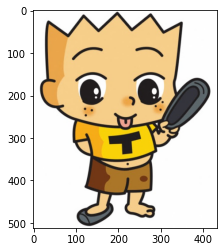

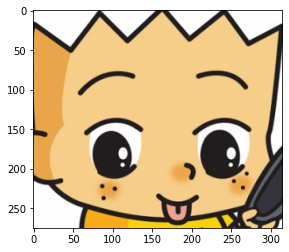

In [18]:
import matplotlib.pyplot as plt
img=cv2.imread('images/down.jpg')
img=cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

plt.imshow(img)
plt.show()

#가로 y 세로 x
plt.imshow(img[10:285, 35:350])
plt.show()